In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
# Load data
data = pd.read_csv("synthetic_data.csv")
data

,Date,Shown,Clicked,Converted,Avg_cost_per_click,Total_revenue,Ad_group,Region,Device_type,CTR
0,01-01-2015,92872,1741,57,1.09,853.47,ad_group_5,Europe,Mobile,0.0187
1,02-01-2015,70159,4364,37,1.12,1035.79,ad_group_4,Asia,Mobile,0.0622
2,03-01-2015,85509,3549,59,0.93,925.85,ad_group_3,Asia,Mobile,0.0415
3,04-01-2015,80173,3205,33,1.03,692.53,ad_group_4,Asia,Desktop,0.0400
4,05-01-2015,84615,4151,37,1.06,570.72,ad_group_2,Europe,Mobile,0.0491
...,...,...,...,...,...,...,...,...,...,...
1995,18-06-2020,72629,4566,33,1.09,435.50,ad_group_3,North America,Desktop,0.0629
1996,19-06-2020,77257,3330,62,0.90,1132.28,ad_group_5,Europe,Desktop,0.0431
1997,20-06-2020,62901,3507,38,1.19,790.17,ad_group_4,North America,Desktop,0.0558
1998,21-06-2020,53863,3431,31,1.14,722.23,ad_group_2,North America,Desktop,0.0637


In [10]:
type(data['Date'][2])

str

In [13]:
data.Date = pd.to_datetime(data.Date)
data.Date

/var/folders/ss/k5h9xc8x4z94lbkhkmrh_k080000gn/T/ipykernel_15343/1412598346.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data.Date = pd.to_datetime(data.Date)


0      2015-01-01
1      2015-02-01
2      2015-03-01
3      2015-04-01
4      2015-05-01
          ...    
1995   2020-06-18
1996   2020-06-19
1997   2020-06-20
1998   2020-06-21
1999   2020-06-22
Name: Date, Length: 2000, dtype: datetime64[ns]

In [14]:
type(data['Date'][2])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
# Clean column names
data.columns = data.columns.str.strip().str.lower()
print(data.columns)

# Handle missing values
data = data.dropna()

if 'date' in X.columns:
    X = X.drop(columns=['date'])

Index(['date', 'shown', 'clicked', 'converted', 'avg_cost_per_click',
       'total_revenue', 'ad_group', 'region', 'device_type', 'ctr'],
      dtype='object')


In [17]:
df = pd.read_csv("synthetic_data.csv")
df

,Date,Shown,Clicked,Converted,Avg_cost_per_click,Total_revenue,Ad_group,Region,Device_type,CTR
0,01-01-2015,92872,1741,57,1.09,853.47,ad_group_5,Europe,Mobile,0.0187
1,02-01-2015,70159,4364,37,1.12,1035.79,ad_group_4,Asia,Mobile,0.0622
2,03-01-2015,85509,3549,59,0.93,925.85,ad_group_3,Asia,Mobile,0.0415
3,04-01-2015,80173,3205,33,1.03,692.53,ad_group_4,Asia,Desktop,0.0400
4,05-01-2015,84615,4151,37,1.06,570.72,ad_group_2,Europe,Mobile,0.0491
...,...,...,...,...,...,...,...,...,...,...
1995,18-06-2020,72629,4566,33,1.09,435.50,ad_group_3,North America,Desktop,0.0629
1996,19-06-2020,77257,3330,62,0.90,1132.28,ad_group_5,Europe,Desktop,0.0431
1997,20-06-2020,62901,3507,38,1.19,790.17,ad_group_4,North America,Desktop,0.0558
1998,21-06-2020,53863,3431,31,1.14,722.23,ad_group_2,North America,Desktop,0.0637


In [18]:
df = df.drop(columns=["Date"])

In [19]:
X = df.drop(columns=["Total_revenue"])
y = df["Total_revenue"]
X
y

0        853.47
1       1035.79
2        925.85
3        692.53
4        570.72
         ...   
1995     435.50
1996    1132.28
1997     790.17
1998     722.23
1999     837.72
Name: Total_revenue, Length: 2000, dtype: float64

In [20]:
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(include=["number"]).columns.tolist()

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

In [22]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Shown', 'Clicked',
                                                   'Converted',
                                                   'Avg_cost_per_click',
                                                   'CTR']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Ad_group', 'Region',
                                                   'Device_type'])])),
                ('model', RandomForestRegressor(random_state=42))])

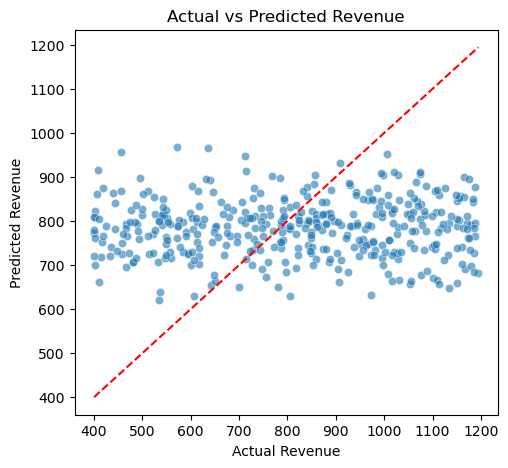

In [26]:
plt.figure(figsize=(12, 5))
# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.show()

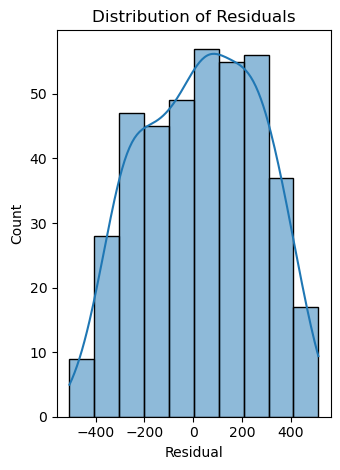

In [27]:
# Plot 2: Residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")

plt.tight_layout()
plt.show()